<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S4E3_Plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steel Plate Defect Prediction
Playground Series - Season 4, Episode 3


####**Dataset Description**
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Steel Plates Faults dataset from UCI. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Files
train.csv - the training dataset; there are 7 binary targets: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults
test.csv - the test dataset; your objective is to predict the probability of each of the 7 binary targets
sample_submission.csv - a sample submission file in the correct format

- https://www.kaggle.com/code/fabrizio78/3rd-place-solution/edit
- https://www.kaggle.com/competitions/playground-series-s4e3/discussion/481016
- https://www.kaggle.com/code/roccoli/multi-label-classification-with-keras
- https://www.kaggle.com/code/samlakhmani/easy-92-196-single-model
- https://www.kaggle.com/code/fabrizio78/playgrounds4e02-eda-baseline/edit
- https://www.kaggle.com/code/ravi20076/playgrounds4e03-eda-binaryclassifier


#### **The Data**

An explanation of each of the steel plate faults present in this Kaggle competition, reminding you that all these faults are superficial:

* **Pastry**: Pastry refers to small patches or irregularities on the surface of the steel plate, typically caused by imperfections in the manufacturing process or handling during transport. These imperfections can affect the surface smoothness and appearance of the steel plate.

* **Z_Scratch**: Z-scratches are narrow scratches or marks on the surface of the steel plate that run parallel to the rolling direction. Various factors, such as handling, machining, or contact with abrasive materials during production or transportation, can cause these scratches.

* **K_Scratch**: K-scratches are similar to Z-scratches but run perpendicular to the rolling direction. They can also be caused by handling, machining, or contact with abrasive materials during manufacturing or transportation processes.

* **Stains**: Stains refer to discolored or contaminated areas on the surface of the steel plate. These stains can result from various sources, such as rust, oil, grease, or other foreign substances that come into contact with the steel surface during processing, storage, or handling.

* **Dirtiness**: Dirtiness indicates the presence of dirt or particulate matter on the surface of the steel plate. This can include various types of debris or contaminants that accumulate during manufacturing, handling, or storage processes.

* **Bumps**: Bumps are raised or protruding areas on the surface of the steel plate. These can be caused by irregularities in the manufacturing process, such as uneven rolling or cooling, or by physical damage during handling or transportation.

* **Other_Faults**: This category likely encompasses a broader range of faults or defects not explicitly categorized in the other fault types listed. It could include various types of surface imperfections, irregularities, or abnormalities that affect the quality or usability of the steel plate.

Here are some further information about the features:

The dataset "Steel Plates Faults" contains 27 features that describe each fault in detail. Here is an explanation of some of the features based on the information gathered from the search results:

**Location Features**:

- X_Minimum: The minimum x-coordinate of the fault.
- X_Maximum: The maximum x-coordinate of the fault.
- Y_Minimum: The minimum y-coordinate of the fault.
- Y_Maximum: The maximum y-coordinate of the fault.

**Size Features**:

- Pixels_Areas: Area of the fault in pixels.
- X_Perimeter: Perimeter along the x-axis of the fault.
- Y_Perimeter: Perimeter along the y-axis of the fault.

**Luminosity Features**:

- Sum_of_Luminosity: Sum of luminosity values in the fault area.
- Minimum_of_Luminosity: Minimum luminosity value in the fault area.
- Maximum_of_Luminosity: Maximum luminosity value in the fault area.

**Material and Index Features**:

- TypeOfSteel_A300: Type of steel (A300).
- TypeOfSteel_A400: Type of steel (A400).
- Steel_Plate_Thickness: Thickness of the steel plate.
- Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, - Outside_Global_Index: Various index values related to edges and geometry.

**Logarithmic Features:**

- LogOfAreas: Logarithm of the area of the fault.
- Log_X_Index, Log_Y_Index: Logarithmic indices related to X and Y coordinates.

**Statistical Features:**

- Orientation_Index: Index describing orientation.
- Luminosity_Index: Index related to luminosity.
- SigmoidOfAreas: Sigmoid function applied to areas.

In [1]:
%%capture
run_n = 0

if run_n==0:
  !pip install tensorflow-addons
  #!pip install shap
  #!pip install eli5
  #!pip install tf-nightly
  #!pip install -U scikit-learn==1.2.0
  !pip install catboost
  #!pip install haversine
  #!pip install pytorch-forecasting
  !pip install umap-learn
  #!pip install reverse_geocoder
  #!pip install --upgrade protobuf
  !pip install colorama
  !pip install imbalanced-learn
  !pip install optuna
  !pip install optuna-integration
  #!pip install pygam
  !pip install keras-tuner --upgrade
  #!pip install pycaret
  #!pip install lightning==2.0.1
  !pip install keras-nlp
  #!pip install MiniSom
  !pip install category_encoders
  !pip install BorutaShap
  !pip install feature-engine

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

from IPython.display import display_html, clear_output;
clear_output();

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
from copy import deepcopy
import re
#from scipy import stats
from random import randint
from prettytable import PrettyTable
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer, KNNImputer

from category_encoders import MEstimateEncoder, CatBoostEncoder, OrdinalEncoder

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
from catboost import CatBoost, CatBoostRegressor
from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import feature_engine as fe

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

# Personal Library

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Using TensorFlow backend
Done, All the required modules are imported. Time elapsed: 8.493544340133667 sec


<Figure size 640x480 with 0 Axes>

In [3]:
%%time

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.75,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : '#0099e6',
         'axes.titlesize'       : 8.5,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

# Color printing
def PrintColor(text:str, color = Fore.BLUE, style = Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string";
    print(style + color + text + Style.RESET_ALL);

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 50);
pd.set_option('display.max_rows', 50);

print();
gc.collect();


CPU times: user 357 ms, sys: 1.61 ms, total: 359 ms
Wall time: 395 ms


159

In [4]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.13.1
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.25.2
scikit-learn: 1.2.2
statsmodels: 0.14.1
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.3


<a id="2.2"></a>
## <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#ffffff; font-size:120%; text-align:left;padding:3.0px; background: #0059b3; border-bottom: 8px solid #e6e6e6" > CONFIGURATION PARAMETERS<br><div>


| Parameter         | Description                                             | Possible value choices|
| ---               | ---                                                     | :-:                   |
|  version_nb       | Version Number                                          | integer               |
|  test_req         | Are we testing syntax here?                             | Y/N                   |  
|  test_sample_frac | Sample size for syntax test                             | float(0-1)/ int       |     
|  gpu_switch       | GPU switch                                              | ON/OFF                |
|  state            | Random state for most purposes                          | integer               |
|  target           | Target column name                                      | yield                 |
|  episode          | Episode Number                                          | integer               |
|  season           | Season Number                                           | integer               |    
|  path             | Path for input data files                               |                       |
|  orig_path        | Path for input original data files                      |                       |
|  dtl_preproc_req  | Proprocessing required                                  | Y/N                   |    
|  adv_cv_req       | Adversarial CV required                                 | Y/N                   |
|  ftre_plots_req   | Feature plots required                                  | Y/N                   |
|  ftre_imp_req     | Feature importance required                             | Y/N                   |
|  conjoin_orig_data| Conjoin original data                                   | Y/N                   |
|  drop_nulls       | Drop original data nulls                                | Y/N                   |    
|  sec_ftre_req     | Secondary features required                             | Y/N                   |
|  scale_req        | Scaling required                                        | Y/N                   |
|  scl_method       | Scaling method                                          | Z/ Robust/ MinMax     |
|  enc_method       | Encoding method                                         |-                      |
|  OH_cols          | Onehot columns                                          |list                   |
|  tgt_mapper       | Target categories                                       |dict                   |   
|  baseline_req     | Baseline model required                                 | Y/N                   |
|  pstprcs_oof      | Post-process OOF after model training                   | Y/N                   |
|  pstprcs_train    | Post-process OOF during model training for dev-set      | Y/N                   |
|  pstprcs_test     | Post-process test after training                        | Y/N                   |
|  ML               | Machine Learning Models                                 | Y/N                   |
|  use_orig_all_folds| Use original data in all folds                         | Y/N                   |
|  n_splits         | Number of CV splits                                     | integer               |
|  n_repeats        | Number of CV repeats                                    | integer               |
|  nbrnd_erly_stp   | Number of early stopping rounds                         | integer               |
|  mdl_cv_mthd      | Model CV method name                                    | RKF/ RSKF/ SKF/ KFold |

In [5]:
# Configuration class:-
class CFG:
    """
    Configuration class for parameters and CV strategy for tuning and training
    Some parameters may be unused here as this is a general configuration class
    """;

    # Data preparation:-
    version_nb         = 4;
    test_req           = "N";
    test_sample_frac   = 0.025;
    gpu_switch         = "OFF";
    state              = 42;
    target             = ["Pastry",	"Z_Scratch",	"K_Scatch",	"Stains",	"Dirtiness",	"Bumps",	"Other_Faults"];
    episode            = 3;
    season             = 4;
    path               = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S{season}E{episode}_Plates";
    orig_path          = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S{season}E{episode}_Plates/Faults.NNA";
    public_subs_path   = None;

    dtl_preproc_req    = "Y";
    adv_cv_req         = "N";
    ftre_plots_req     = 'Y';
    ftre_imp_req       = "Y";

    # Data transforms and scaling:-
    conjoin_orig_data  = "Y";
    drop_nulls         = "N";
    sec_ftre_req       = "Y";
    scale_req          = "N";
    # NOTE---Keep a value here even if scale_req = N, this is used for linear models:-
    scl_method         = "Z";
    enc_method         = 'Label';
    OH_cols            = ["MTRANS"];
    tgt_mapper         = {0 : 0,
                          1 : 1,
                          };

    # Model Training:-
    baseline_req       = "N";
    pstprcs_oof        = "N";
    pstprcs_train      = "N";
    pstprcs_test       = "N";
    ML                 = "Y";

    pseudo_lbl_req     = "N";
    pseudolbl_up       = 0.975;
    pseudolbl_low      = 0.00;

    use_orig_allfolds  = "N";
    n_splits           = 3 if test_req == "Y" else 10;
    n_repeats          = 1 ;
    nbrnd_erly_stp     = 75;
    mdlcv_mthd         = 'RSKF';

    # Ensemble:-
    ensemble_req       = "Y";
    hill_climb_req     = "N";
    optuna_req         = "Y";
    LAD_req            = "N";
    enscv_mthd         = "RSKF";
    metric_obj         = 'maximize';
    ntrials            = 10 if test_req == "Y" else 150;

    # Global variables for plotting:-
    grid_specs = {'visible': True, 'which': 'both', 'linestyle': '--',
                           'color': 'lightgrey', 'linewidth': 0.75};
    title_specs = {'fontsize': 9, 'fontweight': 'bold', 'color': 'tab:blue'};

#print();
PrintColor(f"--> Configuration done!\n");
gc.collect();

CFG.ntrials

--> Configuration done!



150

### 1.2 Connect Drives:

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [7]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Scripts/S4E3_Plates"
os.chdir(folder_script)
import data_analysis as da

da.info_on_functions()

This tool provides the following functionalities:

 1. connect_drives():
Reconnect to Google Drives

 2. load_data() and read_data()[Class method]:
Upload the relevant datasets
Inputs:
- train_dataset='train.csv',
- test_dataset='test.csv',
- old_dataset=None,
- exp_name='S4E1_BankChurn', 
- is_csv=True,
- index_col=0,
- to_drop=[],
- submission='sample_submission.csv',
- base='C:/Users/Fabrizio/Documents/Jupyter Notebook/Kaggle'
The class also gives access to the following functions:
 a - check_nana() to verify the presence of NaN,
 b - summary(self,on='train',cmap='Reds'): Provides basic info on the Dataframe
 c - adversarial_validation(self,kind='train_test',missing_values=np.nan,strategy_num='median',strategy_obj='most_frequent',drop_features=['Exited']): test the possibility to merge old and new train set
 d -  merge_trail_old(self): it merges old and new train set
 e - reduce_mem_usage(self, verbose=True): it changes datatypes to reduce the size of the dataset
 f - check_duplicat

<Figure size 640x480 with 0 Axes>

## 1.0 Upload Dataset:

In [9]:
dataset_manager = da.load_data.read_data(to_drop=[],base="/content/drive/MyDrive/Exercises/Studies_Structured_Data/", exp_name="S4E3_Plates", old_dataset="Faults.csv")
train_df = dataset_manager.train_dataset
test_df = dataset_manager.test_dataset
old_df = dataset_manager.old

/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E3_Plates already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/Models/S4E3_Plates already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Models/S4E3_Plates/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Script/S4E3_Plates/trees_models/ already exists

Current Directory:/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E3_Plates


In [10]:
train_df.head(3)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0


In [11]:
#old_data = pd.read_csv("Faults.NNA", delimiter='\t',header=None)
#old_data.columns=train_df.columns
#old_data.to_csv("Faults.csv",index=True)

In [12]:
test_df.head(3)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.00,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
19220,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.00,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
19221,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.75,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514


In [13]:
old_df.head(3)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0


### 1.1 Preliminary Analsys:

In [14]:
dataset_manager.summary()

data shape: (19219, 34)


,data type,#missing,%missing,#unique,min,max,median,mean
X_Minimum,int64,0,0.000000,1191,0.000000,1705.000000,777.000000,709.854675
X_Maximum,int64,0,0.000000,1259,4.000000,1713.000000,796.000000,753.857641
Y_Minimum,int64,0,0.000000,3345,6712.000000,12987661.000000,1398169.000000,1849756.040012
Y_Maximum,int64,0,0.000000,3341,6724.000000,12987692.000000,1398179.000000,1846605.345439
Pixels_Areas,int64,0,0.000000,1154,6.000000,152655.000000,168.000000,1683.987616
X_Perimeter,int64,0,0.000000,460,2.000000,7553.000000,25.000000,95.654665
Y_Perimeter,int64,0,0.000000,331,1.000000,903.000000,23.000000,64.124096
Sum_of_Luminosity,int64,0,0.000000,2595,250.000000,11591414.000000,18238.000000,191846.678235
Minimum_of_Luminosity,int64,0,0.000000,162,0.000000,196.000000,90.000000,84.808419
Maximum_of_Luminosity,int64,0,0.000000,98,39.000000,253.000000,127.000000,128.647380


In [15]:
dataset_manager.summary(on="test",cmap="Reds")

data shape: (12814, 27)


,data type,#missing,%missing,#unique,min,max,median,mean
X_Minimum,int64,0,0.000000,1131,0.000000,1688.000000,776.000000,709.331356
X_Maximum,int64,0,0.000000,1188,4.000000,1712.000000,796.000000,753.274934
Y_Minimum,int64,0,0.000000,2781,6712.000000,12987661.000000,1378890.500000,1846533.459341
Y_Maximum,int64,0,0.000000,2827,6724.000000,12987692.000000,1378588.000000,1842029.494225
Pixels_Areas,int64,0,0.000000,1070,4.000000,152655.000000,169.000000,1672.908225
X_Perimeter,int64,0,0.000000,435,2.000000,10449.000000,24.000000,96.459497
Y_Perimeter,int64,0,0.000000,316,2.000000,18152.000000,24.000000,64.730607
Sum_of_Luminosity,int64,0,0.000000,2300,535.000000,11591414.000000,18402.000000,192689.299126
Minimum_of_Luminosity,int64,0,0.000000,161,0.000000,203.000000,90.000000,84.548072
Maximum_of_Luminosity,int64,0,0.000000,99,37.000000,253.000000,127.000000,128.688856


In [16]:
new_train = dataset_manager.merge_trail_old()
new_train.shape

(21160, 34)

In [17]:
#dataset_manager.check_nana()

In [18]:
dataset_manager.define_target(["Pastry",	"Z_Scratch",	"K_Scatch",	"Stains",	"Dirtiness",	"Bumps",	"Other_Faults"])
dataset_manager.check_duplicates()

Identified Duplicates in training data: 0
Identified Duplicates in test data: 0


In [19]:
new_train.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [20]:
dataset_manager.train=new_train
dataset_manager.test=test_df

In [21]:
train_df = dataset_manager.train_dataset
train_df.shape

(21160, 34)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21160 entries, 0 to 21159
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              21160 non-null  int64  
 1   X_Maximum              21160 non-null  int64  
 2   Y_Minimum              21160 non-null  int64  
 3   Y_Maximum              21160 non-null  int64  
 4   Pixels_Areas           21160 non-null  int64  
 5   X_Perimeter            21160 non-null  int64  
 6   Y_Perimeter            21160 non-null  int64  
 7   Sum_of_Luminosity      21160 non-null  int64  
 8   Minimum_of_Luminosity  21160 non-null  int64  
 9   Maximum_of_Luminosity  21160 non-null  int64  
 10  Length_of_Conveyer     21160 non-null  int64  
 11  TypeOfSteel_A300       21160 non-null  int64  
 12  TypeOfSteel_A400       21160 non-null  int64  
 13  Steel_Plate_Thickness  21160 non-null  int64  
 14  Edges_Index            21160 non-null  float64
 15  Em

### 1.2 Target Analysis:

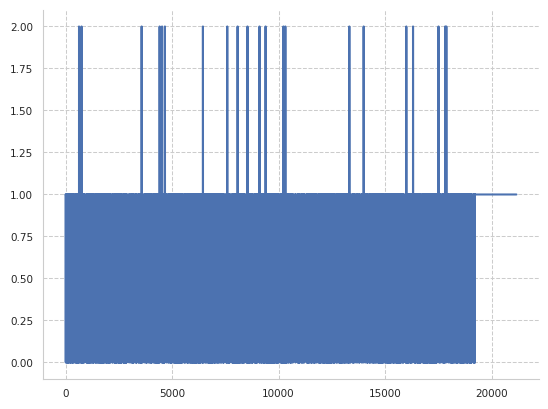

In [23]:
list_tragets = dataset_manager.target_features
target_analysis = train_df[list_tragets]

target_analysis["total"] = target_analysis.sum(axis=1)

target_analysis["total"].plot()
plt.show()

In [24]:
target_analysis.groupby("total")["total"].agg("count")/target_analysis.shape[0]

total
0    0.038658
1    0.960350
2    0.000992
Name: total, dtype: float64

In [25]:
target_analysis[target_analysis.total==0]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,total
8,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
19185,0,0,0,0,0,0,0,0
19189,0,0,0,0,0,0,0,0
19191,0,0,0,0,0,0,0,0
19203,0,0,0,0,0,0,0,0


**Observations with miltiple outcomes are removed as representing only 0.1% of the data**

In [26]:
index_to_remove = target_analysis[target_analysis.total==2].index
train_df.drop(index_to_remove, axis=0,inplace=True)
dataset_manager.train=train_df

train_df = dataset_manager.train_dataset

**Additional Target Features added to define 'No_Faults'**

In [27]:
train_df["No_Faults"] = 1-train_df[list_tragets].sum(axis=1)
dataset_manager.define_target(["Pastry",	"Z_Scratch",	"K_Scatch",	"Stains",	"Dirtiness",	"Bumps",	"Other_Faults","No_Faults"])
list_tragets = dataset_manager.target_features
target_analysis = train_df[list_tragets]
list_tragets

['Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults',
 'No_Faults']

In [28]:
train_df["No_Faults"].max()

1

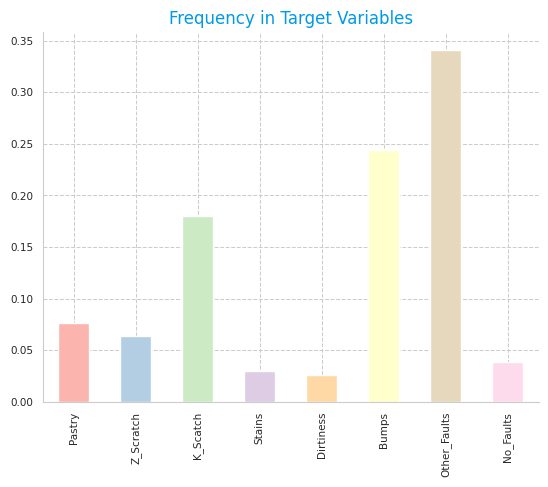

In [29]:
(target_analysis[list_tragets].sum(axis=0)/target_analysis.shape[0]).plot(kind="bar", color=palette_9);
plt.title("Frequency in Target Variables", fontsize=12);

In [30]:
train_df.head(3)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21139 entries, 0 to 21159
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              21139 non-null  int64  
 1   X_Maximum              21139 non-null  int64  
 2   Y_Minimum              21139 non-null  int64  
 3   Y_Maximum              21139 non-null  int64  
 4   Pixels_Areas           21139 non-null  int64  
 5   X_Perimeter            21139 non-null  int64  
 6   Y_Perimeter            21139 non-null  int64  
 7   Sum_of_Luminosity      21139 non-null  int64  
 8   Minimum_of_Luminosity  21139 non-null  int64  
 9   Maximum_of_Luminosity  21139 non-null  int64  
 10  Length_of_Conveyer     21139 non-null  int64  
 11  TypeOfSteel_A300       21139 non-null  int64  
 12  TypeOfSteel_A400       21139 non-null  int64  
 13  Steel_Plate_Thickness  21139 non-null  int64  
 14  Edges_Index            21139 non-null  float64
 15  Em

In [31]:
features_dtype = ["float",  #0
                  "float",  #1
                  "float",  #2
                  "float",  #3
                  "float",  #4
                  "float",  #5
                  "float",  #6
                  "float",  #7
                  "float",  #8
                  "float",  #9
                  "float",  #10
                  "int",    #11
                  "int",    #12
                  "int",    #13
                  "float",  #14
                  "float",  #15
                  "float",  #16
                  "float",  #17
                  "float",  #18
                  "float",  #19
                  "float",  #20
                  "float",  #21
                  "float",  #22
                  "float",  #23
                  "float",  #24
                  "float",  #25
                  "float",  #26
                  "int",   #27
                  "int",   #28
                  "int",   #29
                  "int",   #30
                  "int",   #31
                  "int",   #32
                  "int",   #33
                  "int",   #34
                  ]

dataset_manager.define_dtypes(features_dtype=features_dtype)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21139 entries, 0 to 21159
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              21139 non-null  float64
 1   X_Maximum              21139 non-null  float64
 2   Y_Minimum              21139 non-null  float64
 3   Y_Maximum              21139 non-null  float64
 4   Pixels_Areas           21139 non-null  float64
 5   X_Perimeter            21139 non-null  float64
 6   Y_Perimeter            21139 non-null  float64
 7   Sum_of_Luminosity      21139 non-null  float64
 8   Minimum_of_Luminosity  21139 non-null  float64
 9   Maximum_of_Luminosity  21139 non-null  float64
 10  Length_of_Conveyer     21139 non-null  float64
 11  TypeOfSteel_A300       21139 non-null  int64  
 12  TypeOfSteel_A400       21139 non-null  int64  
 13  Steel_Plate_Thickness  21139 non-null  int64  
 14  Edges_Index            21139 non-null  float64
 15  Em

## 2.0 EDA

### 2.1 Categorical Features

List of Categorical Features: ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Outside_Global_Index']


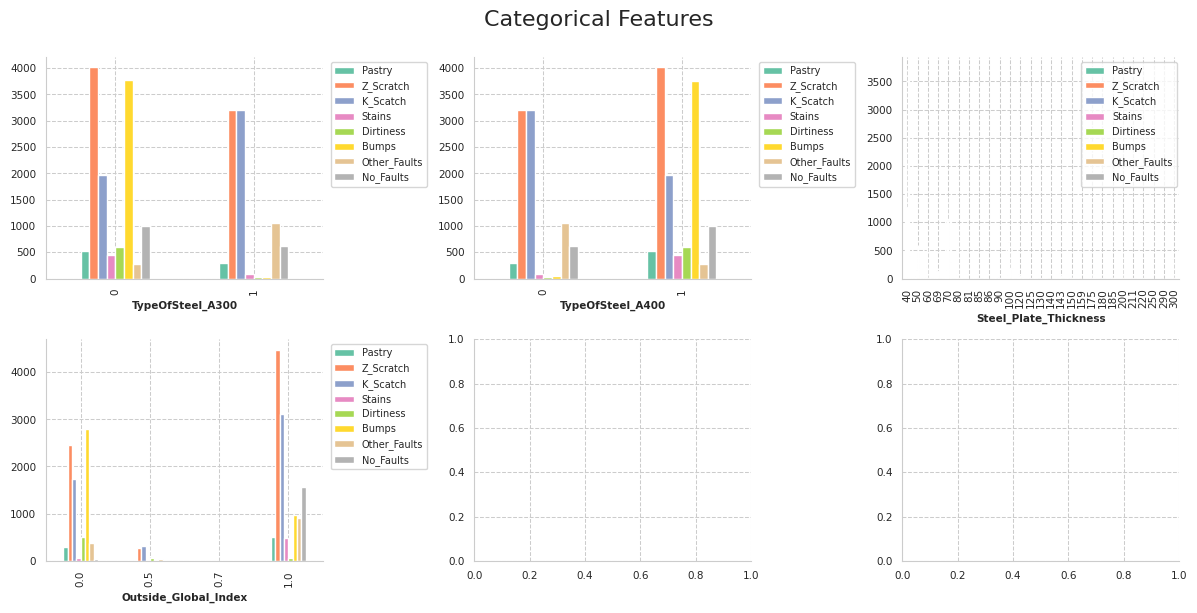

In [32]:
series_review = da.graph_series(train_df, test_df, target=list_tragets)

series_review.plot_cat_features(rows=2,color=palette_8);
#type(list_tragets)

####  2.1.2 Steel_Plate_Thickness

<Figure size 10000x500 with 0 Axes>

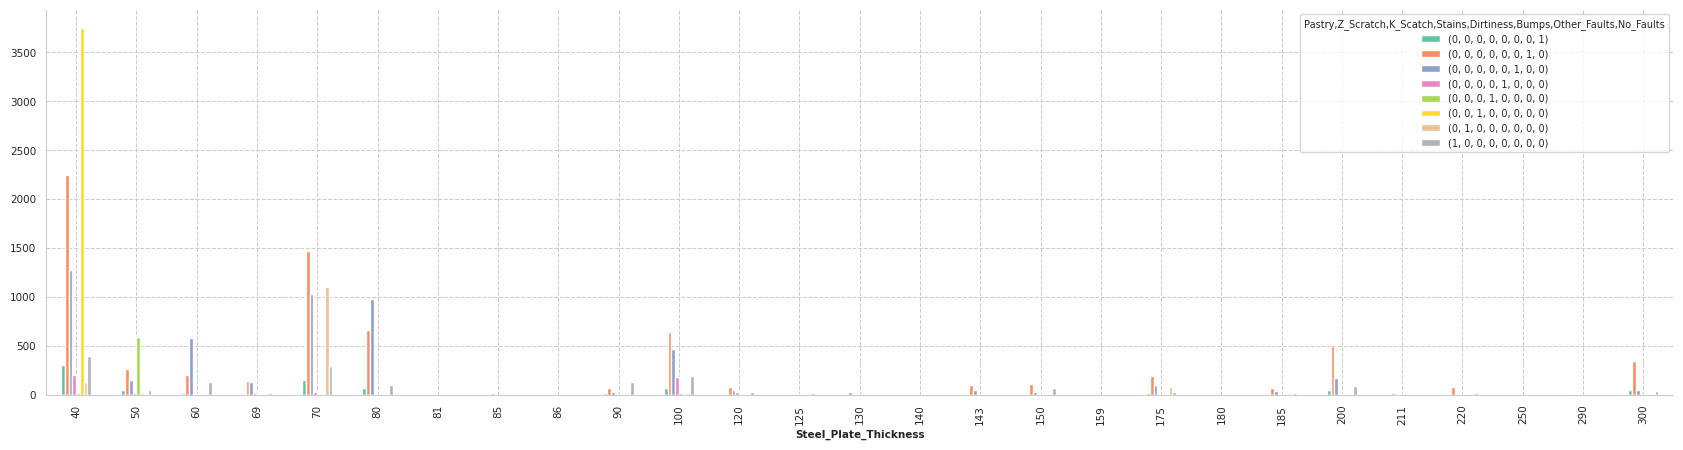

In [33]:
fig = plt.figure(figsize=(100,5))
stacked_cvar = train_df.groupby([*list_tragets,"Steel_Plate_Thickness"])["Steel_Plate_Thickness"].agg("count").unstack(list_tragets);
stacked_cvar.plot(kind='bar', stacked=False, color=palette_8, figsize=(21,5));

In [34]:
train_df.shape

(21139, 35)

In [35]:
def enc_reduction(df):
  x = df.copy()

  replace_values = {40:40,50:50,60:60,69:60,70:70,80:80,81:80,85:80,86:80,90:80,100:100,120:150,110:150,125:150,130:150,140:150,143:150,159:150,175:200,180:200,185:200,
                    200:200,211:300,220:300,250:300,290:300}

  x["Steel_Plate_Thickness"] = x["Steel_Plate_Thickness"].replace(replace_values).values
  xvalues = list(x["Steel_Plate_Thickness"].unique())
  classes = list(range(len(xvalues)))

  class_replace = {40:0,50:1,60:2,70:3,80:4,100:5,150:5,200:6,300:6}
  x["Steel_Plate_Thickness"] = x["Steel_Plate_Thickness"].replace(class_replace).values

  return x

func_enc_reduction = FunctionTransformer(enc_reduction)

In [36]:
x_verify = func_enc_reduction.fit_transform(train_df)
test_verify = func_enc_reduction.transform(test_df)

<Figure size 10000x500 with 0 Axes>

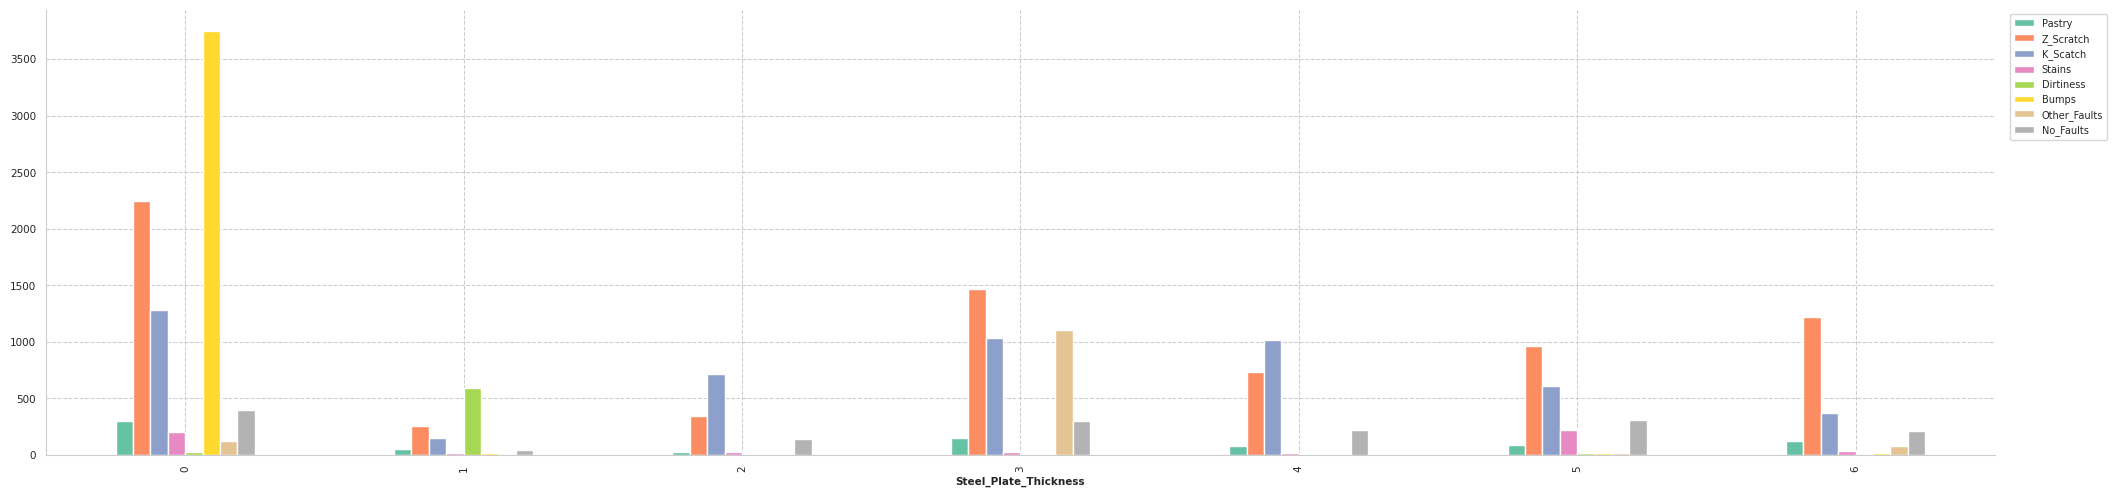

In [37]:
fig = plt.figure(figsize=(100,5));
stacked_cvar = x_verify.groupby([*list_tragets,"Steel_Plate_Thickness"])["Steel_Plate_Thickness"].agg("count").unstack(list_tragets);
stacked_cvar.plot(kind='bar', stacked=False, color=palette_8, figsize=(21,5));
plt.legend(list_tragets, bbox_to_anchor=(1.06,1));
plt.tight_layout();

In [38]:
x_verify.Steel_Plate_Thickness.unique(),test_verify.Steel_Plate_Thickness.unique()

(array([1, 4, 0, 6, 3, 2, 5]), array([5, 0, 2, 3, 6, 4, 1]))

In [39]:
dataset_manager.train=x_verify
dataset_manager.test=test_verify

train_df = dataset_manager.train_dataset
test_df = dataset_manager.test_dataset

In [40]:
test_df.Steel_Plate_Thickness.unique(),train_df.Steel_Plate_Thickness.unique()

(array([5, 0, 2, 3, 6, 4, 1]), array([1, 4, 0, 6, 3, 2, 5]))

#### 2.1.2 Outside_Global_Index

In [41]:
test_df.Outside_Global_Index.unique(),train_df.Outside_Global_Index.unique()

(array([1. , 0. , 0.5]), array([0. , 1. , 0.5, 0.7]))

In [42]:
train_df[train_df.Outside_Global_Index==0.5].shape

(796, 35)

In [43]:
train_df.Outside_Global_Index

def ogi_reduction(df):
  x = df.copy()

  replace_values = {0.7:0.5}

  x["Outside_Global_Index"] = x["Outside_Global_Index"].replace(replace_values).values

  class_replace = {0:0,0.5:1,1:2}
  x["Outside_Global_Index"] = x["Outside_Global_Index"].replace(class_replace).values

  return x

func_ogi_reduction = FunctionTransformer(ogi_reduction)

In [44]:
x_verify = func_ogi_reduction.fit_transform(train_df)
test_verify = func_ogi_reduction.transform(test_df)

<Figure size 10000x500 with 0 Axes>

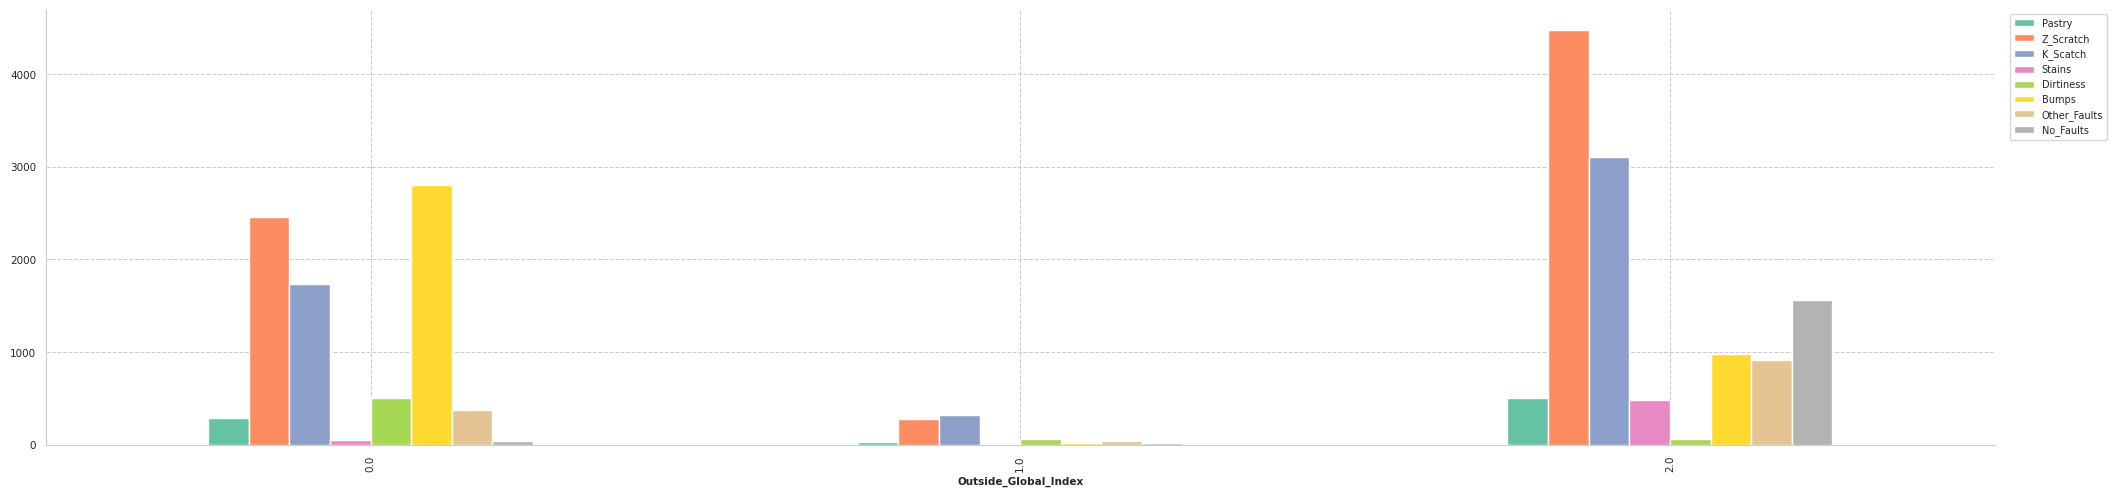

In [45]:
fig = plt.figure(figsize=(100,5));
stacked_cvar = x_verify.groupby([*list_tragets,"Outside_Global_Index"])["Outside_Global_Index"].agg("count").unstack(list_tragets);
stacked_cvar.plot(kind='bar', stacked=False, color=palette_8, figsize=(21,5));
plt.legend(list_tragets, bbox_to_anchor=(1.06,1));
plt.tight_layout();

In [46]:
dataset_manager.train=x_verify
dataset_manager.test=test_verify

train_df = dataset_manager.train_dataset
test_df = dataset_manager.test_dataset

In [47]:
test_df.Outside_Global_Index.unique(),train_df.Outside_Global_Index.unique()

(array([2., 0., 1.]), array([0., 2., 1.]))

#### 2.1.3 TypeOfSteel_A400 & A300

In [48]:
train_df.loc[:,["TypeOfSteel_A400","TypeOfSteel_A300"]].sum(axis=1).value_counts()

1    21119
0       19
2        1
dtype: int64

In [49]:
test_df.loc[:,["TypeOfSteel_A400","TypeOfSteel_A300"]].sum(axis=1).value_counts()

1    12800
0       13
2        1
dtype: int64

In [50]:
train_df[(train_df.TypeOfSteel_A400==1)&(train_df.TypeOfSteel_A300==1)]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,No_Faults
14507,39.0,216.0,840091.0,840385.0,6185.0,247.0,124.0,677593.0,43.0,119.0,1358.0,1,1,0,0.0574,0.4368,0.3864,0.1303,0.6196,0.5224,0.0,3.7989,2.248,1.8325,-0.6136,-0.1916,1.0,0,0,1,0,0,0,0,0


In [51]:
test_df[(test_df.TypeOfSteel_A400==1)&(test_df.TypeOfSteel_A300==1)]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
19563,39.0,216.0,2027555.0,2027621.0,6592.0,266.0,139.0,673434.0,61.0,124.0,1358.0,1,1,0,0.0574,0.3029,0.3886,0.1289,0.6391,0.528,0.0,3.8241,2.243,1.8261,-0.6114,-0.1837,1.0


In [52]:
submission_forced_results = pd.DataFrame(columns=list_tragets)
submission_forced_results.loc[test_df[(test_df.TypeOfSteel_A400==1)&(test_df.TypeOfSteel_A300==1)].index.values[0],:] = train_df[(train_df.TypeOfSteel_A400==1)&(train_df.TypeOfSteel_A300==1)][list_tragets].values

In [53]:
submission_forced_results

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,No_Faults
19563,0,0,1,0,0,0,0,0


In [54]:
train_df[(train_df.TypeOfSteel_A400==0)&(train_df.TypeOfSteel_A300==0)].head(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,No_Faults
686,43.0,172.0,949655.0,949669.0,4915.0,185.0,103.0,508999.0,66.0,127.0,1360.0,0,0,0,0.0690,0.4578,0.3823,0.1027,0.7083,0.5965,0.0,3.7028,2.1430,1.7924,-0.6176,-0.1162,1.0000,0,0,1,0,0,0,0,0
8082,1325.0,1340.0,1005865.0,1005895.0,383.0,35.0,57.0,38206.0,75.0,118.0,1374.0,0,0,0,0.0325,0.3383,0.2069,0.0095,0.3714,1.0000,2.0,2.5832,1.1139,1.6902,0.7931,-0.3131,0.9718,1,0,0,0,0,0,0,0
8117,39.0,221.0,1821207.0,1821379.0,15896.0,670.0,399.0,1847464.0,23.0,141.0,1400.0,0,0,0,0.0557,0.4801,0.9398,0.1280,0.2739,0.4621,2.0,4.2013,2.2529,2.2148,0.0602,-0.0947,1.0000,0,0,1,0,0,0,0,0
8617,48.0,194.0,1700480.0,1800071.0,10913.0,639.0,375.0,1431766.0,31.0,143.0,1402.0,0,0,0,0.0556,0.5822,0.9591,0.1106,0.2781,0.3432,0.0,4.0380,2.1903,2.2175,-0.0409,-0.0224,1.0000,0,0,0,0,0,0,1,0
10470,39.0,212.0,270900.0,270944.0,6310.0,249.0,133.0,685255.0,36.0,124.0,1358.0,0,0,0,0.0605,0.4177,0.3548,0.1261,0.6196,0.7442,2.0,3.8146,2.2330,1.8261,0.6452,-0.1807,1.0000,0,0,1,0,0,0,0,0


In [55]:
test_df[(test_df.TypeOfSteel_A400==0)&(test_df.TypeOfSteel_A300==0)].head(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
19606,41.0,181.0,1223690.0,1223696.0,6059.0,593.0,133.0,699635.0,39.0,126.0,1402.0,0,0,0,0.0605,0.3536,0.3829,0.1057,0.2571,0.4114,0.0,3.7776,2.1703,1.8261,-0.6171,-0.1911,1.0000
19925,41.0,214.0,2300789.0,2300856.0,6686.0,295.0,138.0,687345.0,43.0,127.0,1358.0,0,0,0,0.0604,0.4542,0.3643,0.1285,0.5456,0.4468,0.0,3.8170,2.2430,1.8261,-0.6357,-0.1923,1.0000
20373,39.0,194.0,1892520.0,1892625.0,13033.0,588.0,357.0,1507763.0,27.0,141.0,1400.0,0,0,0,0.0557,0.5290,0.9448,0.1070,0.5682,0.4356,2.0,4.1201,2.1931,2.2330,0.0743,-0.0974,1.0000
23429,1299.0,1306.0,10440356.0,10440367.0,16.0,4.0,3.0,2062.0,113.0,140.0,1358.0,0,0,1,0.0459,0.4000,1.0000,0.0044,1.0000,1.0000,1.0,1.2041,0.7782,0.4771,0.0000,-0.0651,0.1361
23522,39.0,192.0,1612840.0,1612870.0,13203.0,562.0,357.0,1505833.0,37.0,141.0,1400.0,0,0,0,0.0557,0.4950,0.9206,0.1091,0.2646,0.4052,2.0,4.1207,2.1847,2.1987,0.0794,-0.0921,1.0000


**Conclusion**

*TypeOfSteel_A400* and *TypeOfSteel_A300* are complementary and therefore one of them can be eliminated. A400 is then removed.

In [56]:
train_df.drop(columns=["TypeOfSteel_A400"],inplace=True)
test_df.drop(columns=["TypeOfSteel_A400"],inplace=True)

In [57]:
dataset_manager.train=train_df
dataset_manager.test=test_df

train_df = dataset_manager.train_dataset
test_df = dataset_manager.test_dataset

In [58]:
train_df.head(10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,No_Faults
0,584.0,590.0,909972.0,909977.0,16.0,8.0,5.0,2274.0,113.0,140.0,1358.0,0,1,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,0
1,808.0,816.0,728350.0,728372.0,433.0,20.0,54.0,44478.0,70.0,111.0,1687.0,1,4,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,2.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,0
2,39.0,192.0,2212076.0,2212144.0,11388.0,705.0,420.0,1311391.0,29.0,141.0,1400.0,0,0,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,0
3,781.0,789.0,3353146.0,3353173.0,210.0,16.0,29.0,3202.0,114.0,134.0,1387.0,0,0,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,2.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,0
4,1540.0,1560.0,618457.0,618502.0,521.0,72.0,67.0,48231.0,82.0,111.0,1692.0,0,6,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,2.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,0
5,1009.0,1033.0,899231.0,899307.0,409.0,22.0,26.0,47513.0,86.0,118.0,1650.0,1,3,0.2761,0.4136,0.4091,0.0053,0.5454,1.0000,2.0,2.6117,0.9542,1.4150,0.5909,-0.1890,0.8749,0,0,0,0,0,0,1,0
6,596.0,607.0,739072.0,7390760.0,204.0,21.0,21.0,22478.0,89.0,127.0,1373.0,0,0,0.8331,0.2744,0.6842,0.0110,0.7143,1.0000,2.0,2.3096,1.1761,1.3222,0.3158,-0.1497,0.5212,0,0,0,0,0,1,0,0
7,1673.0,1687.0,294065.0,294091.0,571.0,38.0,57.0,53142.0,77.0,110.0,1692.0,0,6,0.1491,0.4326,0.9643,0.0142,0.5686,0.7179,2.0,2.7528,1.3802,1.7559,0.0357,-0.2661,0.9408,1,0,0,0,0,0,0,0
8,507.0,521.0,203252.0,203261.0,101.0,25.0,12.0,12530.0,124.0,140.0,1360.0,0,0,0.7210,0.4815,0.3333,0.0176,0.8000,0.7500,0.0,2.0043,1.3802,0.7782,-0.6667,0.0305,0.3601,0,0,0,0,0,0,0,1
9,893.0,907.0,1341292.0,1341296.0,54.0,6.0,15.0,7052.0,87.0,133.0,1687.0,1,2,0.8088,0.2000,0.5333,0.0037,0.8333,1.0000,2.0,1.7324,0.6990,1.1761,0.4667,-0.1228,0.1400,0,0,0,0,0,1,0,0


['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'No_Faults']


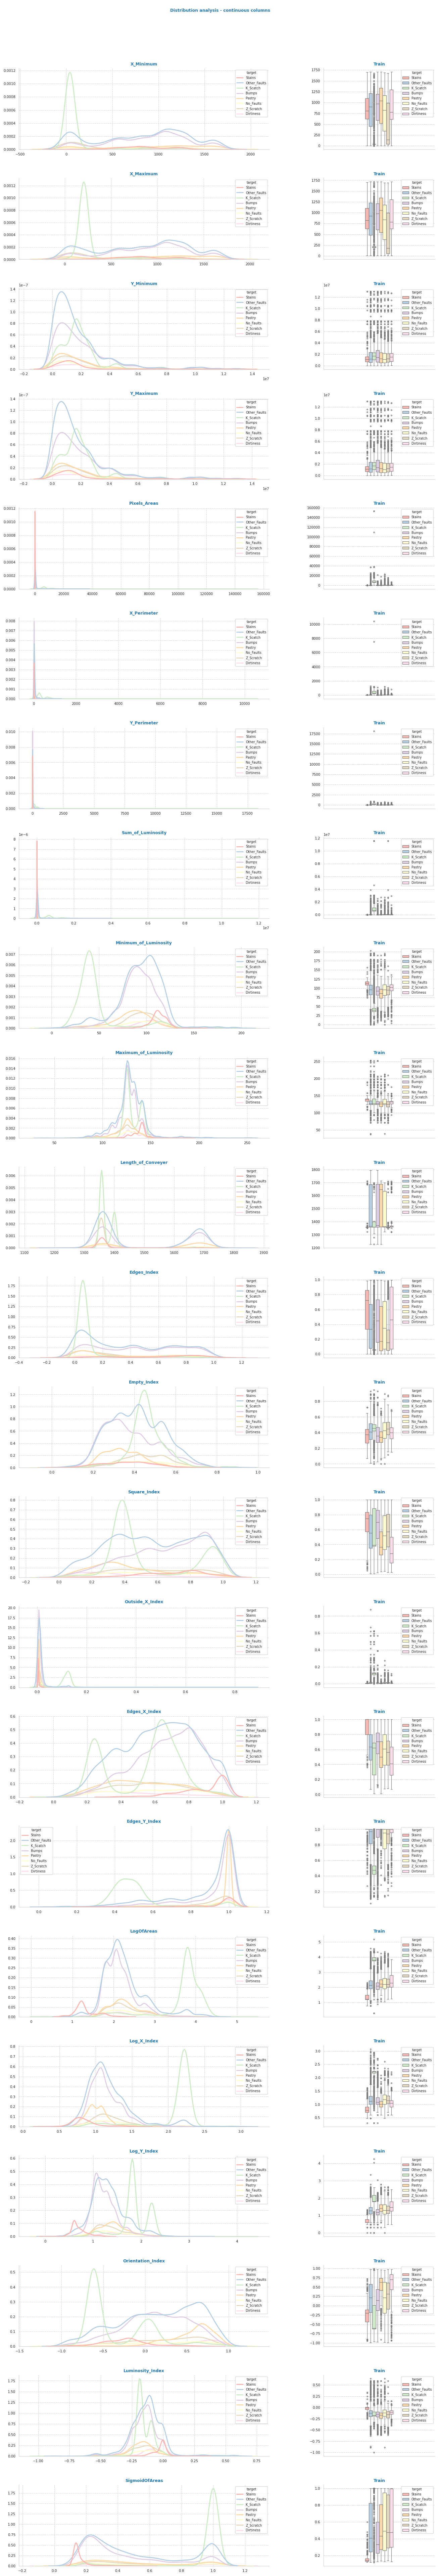

In [59]:
series_review = da.graph_series(train_df, test_df, target=list_tragets)

series_review.plot_float_features()

#### **X_Minimum and X_Maximum**

In [66]:
list_sec = ["X_Minimum",	"X_Maximum"]
list_sec = ["X_Minimum",	"X_Maximum"]

list_tragets

sub_train = train_df[[*list_sec,*list_tragets]].copy()
sub_test = test_df[list_sec].copy()

In [78]:
sub_train.describe()

,X_Minimum,X_Maximum,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,No_Faults,X_ratio
count,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000
mean,697.702209,741.817636,0.076778,0.063390,0.179857,0.030276,0.025545,0.244241,0.341218,0.038696,2.768446
std,531.955302,501.166565,0.266244,0.243669,0.384077,0.171349,0.157778,0.429646,0.474130,0.192875,21.309506
min,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008591
25%,50.000000,214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.009016
50%,755.000000,774.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.018223
75%,1146.000000,1161.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.418980
max,1705.000000,1713.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1665.000000


In [75]:
sub_train["X_ratio"] = sub_train["X_Maximum"].div(sub_train["X_Minimum"]+1)

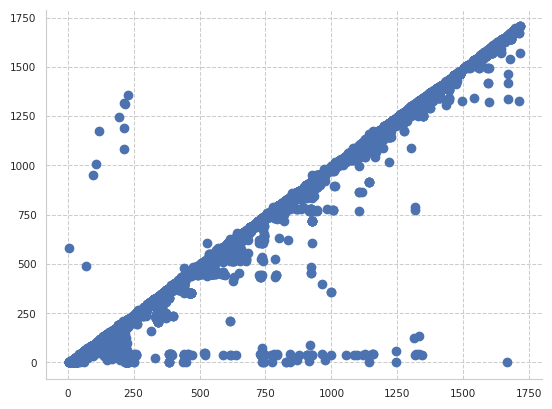

In [77]:
plt.scatter(x=sub_train["X_Maximum"],y=sub_train["X_Minimum"],  )

Feature engineering

As in other tabular competitions, feature engineering can make the difference; don't just bet solely on the representational capabilities of your models.

It is a WIP, but here are some features that I am using in my EDA notebook you can find in the code section:

* Coordinate Range Features: By calculating the range of coordinates (both in the x and y directions), we capture information about the spatial extent of each fault. This could be relevant because faults with larger spatial extents might indicate more severe defects or anomalies in the steel plate

* Size Ratio Features: The ratio of area to perimeter provides insight into the compactness or irregularity of each fault. Faults with higher area-to-perimeter ratios could be more irregular, potentially indicating complex defects requiring closer inspection.

- Luminosity Range Feature: The range of luminosity values within a fault area can indicate variations in brightness or darkness, which might be associated with different types or severities of defects. For example, more extensive luminosity ranges could suggest areas with contrasting levels of brightness, potentially highlighting regions with significant defects.

I will surely add more later as I understand more of the data of this competition :-)